# DSCI 571 Lab Assignment 1

__Due__: December 3, 2017 at 15:00

## Instructions
rubric={mechanics:3, writing:3}

Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/). 

In addition, you must use proper spelling and grammar.

__Note__: 

- The non-optional rubric weights add to 100. 
- The optional rubric weights add to 5.
- There are two optional questions worth no marks. 

## Exercise 1: $k$-NN Fundamentals

Here we will try classification of the famous handwritten digits data set. 

This data set exists in many forms; we will use the one bundled in `sklearn.datasets`. We will also use `sklearn` for classification.

Load the data:

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import random
%matplotlib inline

digits = datasets.load_digits()

You can check out the documentation for the data by running `print(digits['DESCR'])`. We'll extract the features and labels for you:

In [2]:
X = digits['data'] # this is the data with each 8x8 image "flattened" into a length-64 vector.
Y = digits['target'] # these are the labels (0-9).

Here's a plot of a random example:

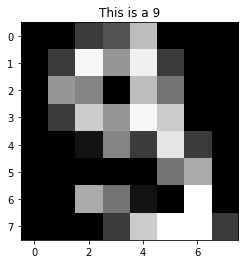

In [3]:
idx = random.randint(0, digits['images'].shape[0]-1) 
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][idx])

### 1(a) Fundamentals

rubric={reasoning:5}

1. How many features are there, and what are they?
2. Which is closer to element 0 (`X[0]`) -- element 1 (`X[1]`) or element 2 (`X[2]`)? Report the two distances (Euclidean).
3. Using the above information, if only elements 1 and 2 are used in a $k$-NN classifier with $k=1$, what would element 0 be classified as, and why?

### 1(b) Investigating error

rubric={reasoning:5}

You'll be using the scikit-learn implementation of the $k$-NN classifier. Documentation is available at http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Using `k=10`, fit a $k$-NN classifier using `X` and `Y`. Obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? This is called the _error rate_.    
2. Choose one case that was not predicted correctly. What was predicted, and what is the correct label? Plot the image, and comment on why you think the classifier made a mistake. 



### 1(c) One Nearest Neighbour error

rubric={reasoning:5}

Now fit the classifier using `k=1`, and again obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? Briefly explain why this error rate is achieved (in one or two sentences; think about how the $k$-NN algorithm works).    
2. With the above error rate in mind, if I give you a new handwritten digit (not in the data set), will the classifier _for sure_ predict the label correctly? Briefly explain why or why not.

## Exercise 2: Investigating $k$-NN Error

This is a continuation of Exercise 1. Each part asks you to investigate some scenario.

### 2(a) The influence of k

rubric={code:5, reasoning:5, viz:5}

Now, split the data into _training_ and _test_ sets. You can choose any reasonable fraction for training vs. testing (50% will do). 

__Note__: It's always a good idea to randomly shuffle the data before splitting, in case the data comes ordered in some way. (For example, if they are ordered by label, then your training set will be all the digits 0-4, and your test set all the digits 5-9, which would be bad... you might end up with 100% error!!) To shuffle your data, you can use [`numpy.random.shuffle`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html).

For various values of $k$, fit (a.k.a. _train_) a classifier using the training data. Use that classifier to obtain an error rate when predicting on both the training and test sets, for each $k$. How do the training error and test error change with $k$? Make a plot to show the trends, and briefly comment on the insights that this plot yields.

### 2(b) Fundamental Tradeoff
rubric={reasoning:5}

Recall the two parts of the fundamental trade-off in machine learning:

1. How small we can make the training error.
2. How well the training error approximates the test error.

In a $k$-nearest neighbour classifier, how does the parameter $k$ affect each of the two parts of the trade-off? What is one way that we could choose $k$ in practice?



### 2(c) The influence of data partition

rubric={reasoning:5}

Now, choose your favourite value of $k$, but vary the proportion of data reserved for the training set, again obtaining training and test error rates for each partition of the data. Plot training and test error (on the same axes) vs. the proportion of training examples. Briefly comment on the insights that this plot yields.

### 2(d) Imbalanced training data

rubric={reasoning:5, code:5}

Now, take a subset of your training data so that you only retain the first 2% of the examples of digits 0-8, but keep 100% of the 9's. This is called an imbalanced training set. 

What is your training and test error, vs. $k$? How does it compare to your performance with all the data?

### 2(e) Imbalanced training data -- fair (Optional)

rubric={reasoning:1}

What we did in (d) above was an unfair comparison, because reducing the amount of training data will generally hurt performance. To compare, randomly remove examples from the original training set such that the number of examples is the same as in part (d) above. Now compare the training and test error to the results from (d). Briefly comment on the results. 

### 2(f) The influence of added noise (Optional; no marks)

__This question is worth no marks.__

Now, add noise to the training data: for each example, with probability 20% replace the training label with a label selected uniformly at random. Remake the plot vs. $k$. What do you observe? Is there a generalizable insight here?

## Exercise 3: Re-scaling

Often, features are measured on different scales. Consider the toy example `data/unequal_scales.csv`, which has two features (`x1` and `x2`) and four labels (`A` through `D`). Feel free to use R for this question (but it's up to you). 

__Note__: To annotate a `ggplot2` plot with a circle, you can add the function found in [Vincenzo's gist](https://gist.github.com/vincenzocoia/58b26f6778647be1803d0b7348e674ec) as a layer. 

### 3(a) Leaving the data as-is

rubric={viz:5, reasoning:5}

1. Make a scatterplot of `x1` and `x2`, and indicate the category using some other aesthetic (like colour and/or shape).
2. Draw a circle, centered around the point `(x1,x2)=(1,0)`, containing the $k=10$ nearest points to `(1,0)`. 
3. What would the point `(1,0)` be categorized as, using these data with $k$-NN, $k=10$? Why? Comment on whether you think it's a good idea to categorize the point `(1,0)` using a circle.

### 3(b) Re-scaling

rubric={code:5, reasoning:5}

To prevent this problem from happening, we can re-scale the data so that each feature has unit variance. We can achieve this by _normalizing_ the data -- that is, subtracting by the sample mean, then dividing by the sample standard deviation (you can achieve this using the `scale` function in R).

1. Normalize the two features. What does the point `(1,0)` become on this new scale?
2. Make another scatterplot of the re-scaled features, with a circle centered around the re-scaled point containing the $k=10$ nearest neighbours. 
3. What would the re-scaled point be categorized as? Why? Comment on whether you think the re-scaling is appropriate, and why. 

### 3(c) Comparing errors

rubric={viz:3, reasoning:3}

Using all the data as training data, plot the training error as a function of $k$. Do this for both the original and scaled data. How do the errors compare?

## Exercise 4: decision trees with binary features
<!-- rubric={reasoning:5,code:4,mechanics:1} -->

The file `newsgroups.pkl` is a Pickle file containing the following objects:
* `groupnames`: The names of four newsgroups.
* `wordlist`: A list of words that occur in posts to these newsgroups.
*  `X`: A binary matrix as a scipy sparse matrix ([documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.spmatrix.html#scipy.sparse.spmatrix); [more info](http://www.scipy-lectures.org/advanced/scipy_sparse/index.html)). Each row corresponds to a post, and each column corresponds to a word from the word list. A value of $1$ means that the word occured in the post. Note: if you want to convert a sparse matrix to a regular dense numpy array, do `X.toarray()`.
* `y`: A vector with values $0$ through $3$, with the value corresponding to the newsgroup that the post came from (comp.*, rec.*, sci.*, talk.*).
* `Xtest` and `ytest`: the word lists and newsgroup labels for additional newsgroup posts.


The code below loads the data, fits a decision stump to the training data, and then evaluates the error of the model on the training data. Running the demo shows that decision stumps have a classification error of $0.60$, which is a bit better than just predicting the most common label (which obtains an error of $0.66$). The image below gives an interpretation of the decision stump that is learned:
![](data/decisionStump.png)
This is an interpretable but not very accurate model. 

Your tasks follow the code chunk.

In [4]:
import numpy as np
import pickle

# A decision stump that splits on a single variable,
# assuming that X is binary {0,1} and is a scipy sparse matrix
# and y is categorical {0,1,2,3,...,C-1}
class DecisionStump():
    
    def __init__(self, classnames, inputnames=None):
        self.splitVariable = None
        self.label1 = None
        self.label0 = None
        self.is_fit = False
        self.classnames = classnames
        self.inputnames = inputnames
        self.C = len(classnames) # number of classes

    def fit(self, X, y):
        N,D = X.shape

        # Count the occurrences of each label
        count = np.zeros(self.C)
        for n in range(N):
            count[y[n]] += 1
        
        # Get the error if you didn't split at all 
        # and just predicted the most popular class
        maxLabel = np.argmax(count)
        minError = np.sum(y != maxLabel) 
#         print('Error by just predicting class %d: %f' % (maxLabel, minError/len(y)))
        
        splitVariable = None
        splitLabel0 = maxLabel
        splitLabel1 = maxLabel

        # Loop over features looking for the best split
        for d in range(D):
            # Count frequency of each class label when the feature is 1, and when it is 0
            # We do things a bit weirdly because X is a sparse matrix
            count1 = np.zeros(self.C)
            for n in X[:,d].nonzero()[0]:
                count1[y[n]] += 1
            count0 = count - count1
            
            # Compute majority class (the class we would predict) in each case 
            maxLabel0 = np.argmax(count0)
            maxLabel1 = np.argmax(count1)

            # Construct a vector yhat containing the predictions
            yhat = np.zeros(N) + maxLabel0
            yhat[X[:,d].nonzero()[0]] = maxLabel1
            # Compute number of classification errors
            errors = np.sum(yhat != y)

            # Compare to minimum error so far
            if errors < minError:
                # This is the lowest error, store this value
                minError = errors
                splitVariable = d
                splitLabel1 = maxLabel1
                splitLabel0 = maxLabel0

        self.splitVariable = splitVariable
        self.label1 = splitLabel1
        self.label0 = splitLabel0
        self.is_fit = True
        
    def predict(self, X):
        M,D = X.shape

        if self.splitVariable is None:
            return self.label0 * np.ones(M)

        yhat = np.zeros(M)
        for m in range(M):
            if X[m,self.splitVariable] == 1:
                yhat[m] = self.label1
            else:
                yhat[m] = self.label0      
        return yhat
    
    def show(self):
        assert self.is_fit
        if self.inputnames is None:
            split_name = "Variable %d" % self.splitVariable
        else:
            split_name = self.inputnames[self.splitVariable]
        if self.classnames is None:
            class_name0 = "Class %d" % self.label0
            class_name1 = "Class %d" % self.label1
        else:
            class_name0 = self.classnames[self.label0]
            class_name1 = self.classnames[self.label1]

        print('If "%s" is absent,  predict "%s"' % (split_name, class_name0))
        print('If "%s" is present, predict "%s"' % (split_name, class_name1))

        
with open('data/newsgroups.pkl', 'rb') as f:
    data = pickle.load(f)
X = data['X']
y = data['y']
classnames = data['groupnames']
wordnames = data['wordlist']
model = DecisionStump(classnames=classnames, inputnames=wordnames)
print('Fitting...')
model.fit(X, y)
model.show()
print('Predicting...')
pred = model.predict(X)
training_error = np.sum(pred != y)/len(y)
print('Training error with decision stump = %f' % training_error)

Fitting...
If "windows" is absent,  predict "talk.*"
If "windows" is present, predict "comp.*"
Predicting...
Training error with decision stump = 0.600296


### 4(a) Implementing a decision tree

rubric={reasoning:5}

The documentation for the scikit-learn implementation of the decision tree classifier is at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

1. Briefly discuss each of the parameters accepted by this class.
2. Using sklearn's decision tree classifier, report the training and test accuracy when using a decision tree of depth $10$.

__Note__: Above code is for demonstration, but you don't actually have to use it. 

### 4(b) Decision Tree Picture (Optional)

rubric={reasoning:1}

By inspecting the decision tree, draw a picture (similar to the one above) showing the learned decision tree when the maximum depth is $2$.

### 4(c) Entropy Criterion (Optional)

rubric={reasoning:2}

Modify your code by creating an option to use information gain (entropy reduction) as a split criterion, rather than minimizing error. Compare the training and testing error in each case, with a tree of depth 10. Briefly discuss your results.

### 4(d) Continuous Features (Optional; no marks)

__This is worth no marks.__

Explain how you would modify the `DecisionStump` code to handle continuous features rather than only binary features.

## Exercise 5: Contemplating decision trees

rubric={reasoning:5}

Recall the two parts of the fundamental bias-variance trade-off in machine learning:

1. How small we can make the training error.
2. How well the training error approximates the test error.

In a decision tree classifier, how do the different parameters affect each of the two parts of the trade-off, if at all?

## Exercise 6: Training error vs. test error, overfitting
rubric={reasoning:5,viz:3}

Expanding on the above by focusing in on the tree depth parameter, make a plot with the depth of the decision tree on the $x$-axis (varying it from $1$ through $15$) and the error on the training data $\{X,y\}$ on the $y$-axis. Then, make the analogous plot with test error instead of training error. Briefly explain your results. 

You can use sklearn's decision tree classifier for this.

## Exercise 7: Decision tree regression (Optional) 

rubric={reasoning:1}

Decision trees can also be used for regression; see [here](http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) and [here](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Read up on this a bit and briefly explain how this works. Compare Decision Tree Regression to some of the methods you are learning in DSCI 561.